# Introduction to Machine Learning - Exercise 3
* The aim of the exercise is to learn how to use distance metrics and k-NN classifier.

## Import used packages

In [10]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use
from sklearn.neighbors import KNeighborsClassifier # k-nearest neighbors
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.metrics import accuracy_score # accuracy
from sklearn.preprocessing import StandardScaler # standardize features
import math

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/lubsar/EFREI-Introduction-to-Machine-Learning/main/datasets/iris.csv

![meme01](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/knn_iris.png?raw=true)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lubsar/EFREI-Introduction-to-Machine-Learning/main/datasets/iris.csv', sep=',')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# We will take a look at the data first
* sepal_length, sepal_width, petal_length, petal_width are the features

* **species** is the target variable

<Axes: xlabel='species', ylabel='petal_length'>

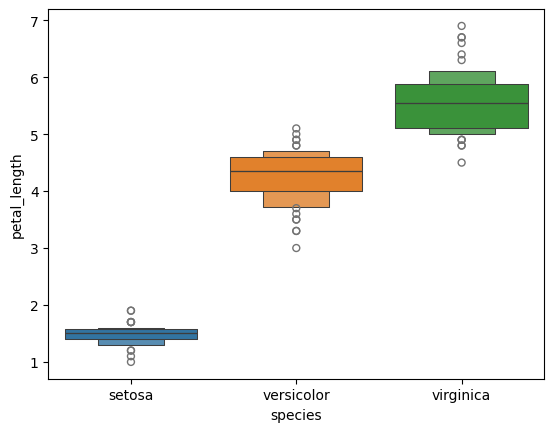

In [5]:
sns.boxenplot(data=df, x= 'species', y = 'petal_length', hue='species')

<Axes: xlabel='species', ylabel='sepal_width'>

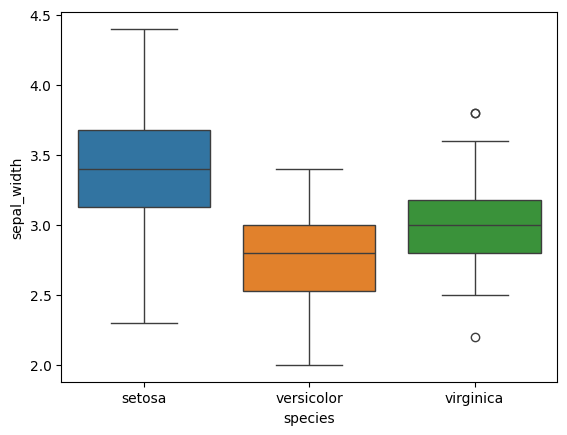

In [3]:
sns.boxplot(data=df, x='species', y='sepal_width', hue='species')

<Axes: xlabel='species', ylabel='petal_width'>

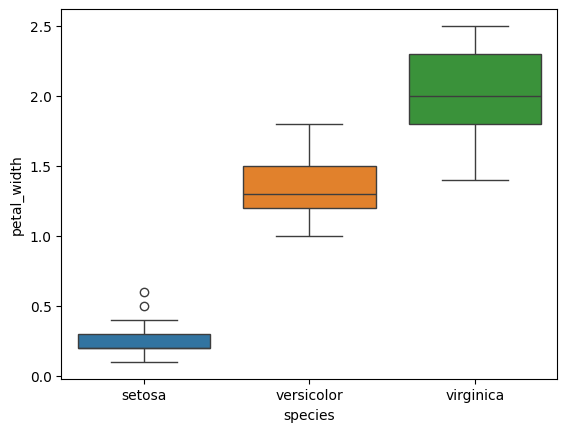

In [6]:
sns.boxplot(data=df, x='species', y='petal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

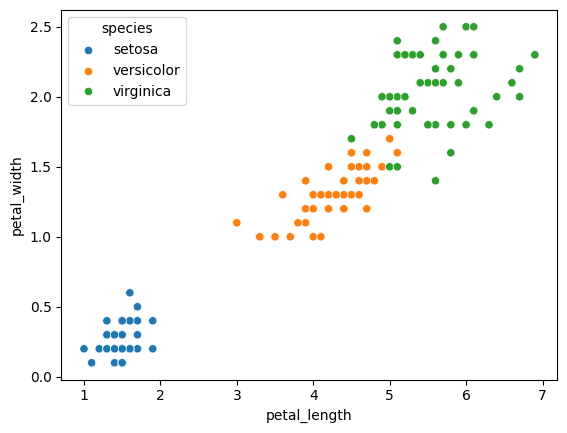

In [9]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

# 🔎 What features seems to be the most discriminative?

# 🚀 k-Nearest Neighbors classifier
* How does it work?
* What is a distance metric?
  * Which one is default for k-NN?

### Example: Calculating Euclidean Distance

Given two vectors with 5 numbers:

- **Vector A**: (2, 4, 6, 8, 10)
- **Vector B**: (1, 3, 5, 7, 9)

**🔎 What is the result?**

### Example: Calculating Manhattan Distance

Given two vectors with 5 numbers:

- **Vector A**: (2, 4, 6, 8, 10)
- **Vector B**: (1, 3, 5, 7, 9)

**🔎 What is the result?**

### Example: Finding the 3 Closest Vectors and Applying Majority Voting

We are given one **selected vector** and a set of **5 different vectors**. Each vector belongs to one of two classes: **Class 0** or **Class 1**.

We will calculate the Euclidean distance between the selected vector and each of the different vectors, find the 3 closest vectors, and then assign a class to the selected vector using majority voting.

#### Selected Vector
- **Vector S**: (2, 3, 4)  
  - Class: **Unknown** (to be determined)

#### Set of Different Vectors (with classes)
- **Vector A**: (1, 2, 3), Class 0
- **Vector B**: (3, 3, 3), Class 1
- **Vector C**: (2, 5, 6), Class 1
- **Vector D**: (0, 0, 0), Class 0
- **Vector E**: (4, 4, 4), Class 1

**🔎 What is the class?**

![meme02](https://github.com/lubsar/EFREI-Introduction-to-Machine-Learning/blob/main/images/knn_meme_01.jpg?raw=true)

## 📌 Normalizing & Splitting the Data

### **Splitting the Data**
-  The data is divided into two subsets:
  - **Training Data**: Used to train the machine learning model.
    - The algorithm learns the relationship between features and the target.
    - It finds patterns in the training data that will help in making predictions on unseen data.
  -  **Test Data**: Unseen data used to evaluate the model’s performance.
       - 📊 The model makes predictions on the test data.
       - 🔁 These predictions are then compared to the actual target values for accuracy assessment.
  
### ⚖️ **Normalizing the Data**
- Ensuring features are on a similar scale improves the performance of many machine learning algorithms.
- 🎯 Important step for any distance-based algorithm (k-means, knn or even linear regression)

# Split the data into features and labels

In [14]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y = df['species']

# ⚡ Split the data into train and test set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=41)


In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

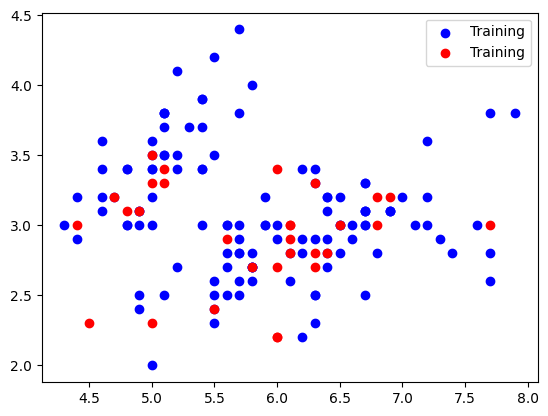

In [21]:
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]

plt.scatter(X_train_2d.iloc[:, 0], X_train_2d.iloc[:, 1], c='blue', label='Training')
plt.scatter(X_test_2d.iloc[:, 0], X_test_2d.iloc[:, 1], c="red", label = 'Training')
plt.legend()
plt.show()

# ⚡ Standardize features

In [23]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [24]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-6.513308e-16,4.736952e-16,2.072416e-16,1.480297e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.865852e+00,-2.453556e+00,-1.541533e+00,-1.419795e+00
25%,-9.064423e-01,-6.472572e-01,-1.261594e+00,-1.160472e+00
50%,-1.868850e-01,-1.956824e-01,3.340611e-01,1.361447e-01
75%,6.825800e-01,7.074672e-01,7.539702e-01,7.844529e-01
max,2.451492e+00,2.965341e+00,1.761752e+00,1.692084e+00


# 🚀 Fitting and Evaluating the Model
* We are now ready to train the model.
* For this, we’ll use a fixed value of 3 for k.
  * 📒 We can try different values as well
* We first create an instance of the kNN model, then fit this to our training data.
  * **We pass both the features and the target variable, so the model can learn.**

In [25]:
alg = KNeighborsClassifier(n_neighbors=3)
alg.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=3)

# 📈 The last step is getting the predictions and calculating the accuracy of the model

In [26]:
y_pred = alg.predict(X_test_std)

In [27]:
y_pred

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor'],
      dtype=object)

## Accuracy score
* 📌 Accuracy is the proportion of correctly classified instances
* It is a good measure when the classes are balanced
    * 🔎 What does balanced mean?
* Range of accuracy_score is [0, 1]
    * **1** is the **best** score
    * **0** is the **worst** score

### 🚀 What if `k=5`? What `accuracy_score` does it produce? Try it!
* 🔎 Is the result better or worse? Why?

In [28]:
alg_2 = KNeighborsClassifier(n_neighbors=5)
alg_2.fit(X_train_std, y_train)
y_pred_2 = alg_2.predict(X_test_std)
accuracy_score(y_test, y_pred_2)

0.9

# ✅ Task
- 📒 Code two python functions `my_euclidean_distance` and `my_manhattan_distance` which will calculate the distances for two given vectors
- Code function `find_neighbour`
  - 📌 It will let you select `my_euclidean_distance` or `my_manhattan_distance` for distance calculation
  - 📌 It will find the closest vector from a set of vectors to the target vector and return it
- 🚀 Test the functions on the vectors that we have used in examples on the blackboard

In [37]:
def my_euclidean_distance(x: list, y:list) -> float:
  distance = 0
  for i in range(len(x)):
    distance += pow((x[i] - y[i]), 2)
  return math.sqrt(distance)

def my_manhattan_distance(x: list, y:list) -> float:
    distance = 0
    for i in range(len(x)):
        distance += abs(x[i] - y[i])
    return distance

# distance = 'euclidean_distance' or 'manhattan_distance'
def find_neighbour(target_vector: list, vectors: list[list], distance: str = 'euclidean_distance') -> list:
    if distance == 'euclidean_distance':
        dist_func = my_euclidean_distance
    elif distance == 'manhattan_distance':
        dist_func = my_manhattan_distance
    else:
        raise ValueError("Unknown distance metric. Use 'euclidean_distance' or 'manhattan_distance'.")


    min_dist = float('inf')
    nearest_vector = None

    for v in vectors:
        d = dist_func(target_vector, v)
        if d < min_dist:
            min_dist = d
            nearest_vector = v

    return nearest_vector



Nearest (Euclidean): [3, 3, 3]
Nearest (Manhattan): [3, 3, 3]


In [45]:
target = [4, 1, 1]
vectors = [[1, 2, 3], [3, 3, 3], [2, 5, 6], [0, 0, 0], [4, 4, 4]]

print("Nearest (Euclidean):", find_neighbour(target, vectors, distance="euclidean_distance"))
print("Nearest (Manhattan):", find_neighbour(target, vectors, distance="manhattan_distance"))

Nearest (Euclidean): [3, 3, 3]
Nearest (Manhattan): [3, 3, 3]
